<a href="https://colab.research.google.com/github/Daltonlbs/ColabProjects/blob/main/Factor_investing_%2B_Backtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
import quantstats as qs

import yfinance as yf
#import fix_yahoo_finance as yf
yf.pdr_override()   # Corrigir erro: 'Error using pandas-datareader: No data fetched using 'YahooDailyReader'

# Como funciona a lógica do programa?

* Pegar composição do Ibovespa desde 2015. (Definir universo investível)
* Criar a lista de códigos de negociação de todas as empresas que passaram no Ibovespa desde 2015.
* Puxar as cotações dessa lista de códigos de negociação. 
* Tratar os dados de cotação: Lidar com dados faltantes, mudar para a frequência mensal e correção/extração das datas. 
* Calcular retornos mensais e 6 meses (retorno da carteira e indicador momento 6 meses).
* Tratar dados de retorno e preço para um formato mais amigável. 
* Calcular retornos do modelo.
* Puxar dados do Ibovespa.
* Tretar os dados e calcular retorno mensal do Ibovespa.
* Visualizar retornos e estatística mensal do modelo e do Ibovespa.
* Calcular retorno ano a ano.
* Calcular retorno acumulado.
* Visualizar retorno acumulado.

In [ ]:
tickers = pd.read_excel("drive/My Drive/Colab Notebooks/composicao_ibov.xlsx")
#toto = pd.read_csv("drive/My Drive/Colab Notebooks/Dados/toth.csv")


tickers.head()

,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
0,ABEV3,ABEV3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,...,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3
1,AMER3,BBAS3,ABEV3,BBDC4,BBDC4,ABEV3,ABEV3,ABEV3,BBDC4,ABEV3,...,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4
2,AURE3,BBDC3,BBDC4,ABEV3,ABEV3,BBDC4,BBDC4,BBDC4,ABEV3,BBDC4,...,ITUB4,PETR3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4
3,B3SA3,BBDC4,BRFS3,PETR4,PETR4,BRFS3,PETR4,PETR4,PETR4,PETR4,...,PETR3,ITUB4,BBDC4,PETR3,BBDC4,BBDC4,BBDC4,BBDC4,PETR3,PETR3
4,B3SA3,BBSE3,CIEL3,BRFS3,PETR3,PETR4,BRFS3,BRFS3,BRFS3,BRFS3,...,BBDC4,BBDC4,PETR3,BBDC4,B3SA3,PETR3,PETR3,PETR3,BBDC4,BBDC4


In [ ]:
#pegando lista de tickers

intervalo_tempo = tickers.columns

lista_tickers = []

for mes in intervalo_tempo:

    tickers_no_ano = tickers[mes]

    tickers_no_ano = tickers_no_ano.dropna()

    tickers_no_ano = tickers_no_ano + ".SA"

    lista_tickers.append(tickers_no_ano)


lista_tickers_finais = pd.concat(lista_tickers)

lista_tickers_finais = lista_tickers_finais.drop_duplicates()

lista_tickers_finais = list(lista_tickers_finais)

lista_tickers_finais

['ABEV3.SA',
 'AMER3.SA',
 'AURE3.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'BRPR3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CYRE3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'EQTL3.SA',
 'FIBR3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HGTX3.SA',
 'HYPE3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'LREN3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'OIBR3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RENT3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SUZB3.SA',
 'TIMS3.SA',
 'UGPA3.SA',
 'USIM5.SA',
 'VALE3.SA',
 'VALE5.SA',
 'VIVT3.SA',
 'YDUQ3.SA',
 'WEGE3.SA',
 'ELET6.SA',
 'TAEE11.SA',
 'FLRY3.SA',
 'MGLU3.SA',
 'SAPR11.SA',
 'VVAR11.SA',
 'JPSA3.SA',
 'CVCB3.SA',
 'VIIA3.SA',
 'LOGG3.SA',
 'VBBR3.SA',
 'IRBR3.SA',
 'AZUL4.SA',
 'HAPV3.SA',
 'BPAC1

In [ ]:
#puxando dados de cotação ajustada

dados_cotacoes = pdr.get_data_yahoo(lista_tickers_finais, start="2015-06-30", end= "2022-08-12" )['Adj Close']



[***                    7%                       ]  7 of 104 completedGot error from yahoo api for ticker JPSA3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[***************       32%                       ]  33 of 104 completedGot error from yahoo api for ticker LCAM3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[**********************55%*                      ]  57 of 104 completedGot error from yahoo api for ticker BIDI11.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[**********************56%**                     ]  58 of 104 completedGot error from yahoo api for ticker HGTX3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[**********************59%***                    ]  61 of 104 completedGot error from yahoo api for ticker BIDI4.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be d

In [ ]:
#resample pra mensal

ultima_linha = dados_cotacoes.iloc[-1:]
dados_cotacoes_mensais = dados_cotacoes.resample("M").last()

dados_cotacoes_mensais

,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441732,5.577975,19.304613,NaN,NaN,NaN,2.934543,16.309515,9.621760,9.531115,...,29.088482,3.501015,11.936955,14.912728,NaN,6.839885,22.284313,11.133474,6.454641,13.737410
2015-07-31,15.832044,5.267337,17.118650,NaN,NaN,NaN,2.630275,14.811561,9.517624,9.218801,...,31.078419,3.339561,11.662843,14.022557,NaN,7.655103,23.290108,8.598620,6.380654,10.890436
2015-08-31,15.523046,5.139030,14.762350,NaN,NaN,NaN,2.748285,12.068586,8.666288,7.738235,...,28.220438,2.532288,11.695476,13.543974,NaN,7.655103,20.844772,6.769551,5.712234,9.543482
2015-09-30,15.913108,4.578724,14.062085,NaN,NaN,NaN,2.824768,10.458094,8.138359,7.197114,...,29.701044,2.846699,10.820924,12.749520,NaN,2.704141,18.741167,3.936479,5.286228,10.790946
2015-10-31,15.642705,5.767764,13.797121,NaN,NaN,NaN,2.906350,10.987877,8.082144,7.062171,...,29.789970,2.362336,11.357888,13.762343,NaN,2.883091,20.523949,4.224756,4.926970,11.831775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,14.520000,19.600000,24.000000,15.280000,14.572941,21.969999,13.064609,32.461613,14.627091,17.669100,...,12.676209,11.310000,79.185760,NaN,20.733179,2.970000,52.545773,NaN,29.854155,16.120001
2022-05-31,14.190000,21.750000,20.100000,15.840000,13.960000,20.110001,12.543989,35.928734,16.579060,20.166822,...,14.370000,10.960000,81.961868,NaN,19.083948,3.140000,50.516808,NaN,25.162788,16.180000
2022-06-30,13.400000,19.139999,13.430000,14.270000,13.620000,12.380000,10.892418,32.994507,14.301016,17.113779,...,12.310000,8.650000,72.787384,NaN,16.403948,1.920000,46.568485,NaN,26.276960,13.070000


In [ ]:
#adicionando uma linha
dados_cotacoes_mensais = dados_cotacoes_mensais.append(ultima_linha)

#excluindo uma linha
dados_cotacoes_mensais = dados_cotacoes_mensais.drop("2022-08-31", axis = 0)


dados_cotacoes_mensais

,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441732,5.577975,19.304613,NaN,NaN,NaN,2.934543,16.309515,9.621760,9.531115,...,29.088482,3.501015,11.936955,14.912728,NaN,6.839885,22.284313,11.133474,6.454641,13.737410
2015-07-31,15.832044,5.267337,17.118650,NaN,NaN,NaN,2.630275,14.811561,9.517624,9.218801,...,31.078419,3.339561,11.662843,14.022557,NaN,7.655103,23.290108,8.598620,6.380654,10.890436
2015-08-31,15.523046,5.139030,14.762350,NaN,NaN,NaN,2.748285,12.068586,8.666288,7.738235,...,28.220438,2.532288,11.695476,13.543974,NaN,7.655103,20.844772,6.769551,5.712234,9.543482
2015-09-30,15.913108,4.578724,14.062085,NaN,NaN,NaN,2.824768,10.458094,8.138359,7.197114,...,29.701044,2.846699,10.820924,12.749520,NaN,2.704141,18.741167,3.936479,5.286228,10.790946
2015-10-31,15.642705,5.767764,13.797121,NaN,NaN,NaN,2.906350,10.987877,8.082144,7.062171,...,29.789970,2.362336,11.357888,13.762343,NaN,2.883091,20.523949,4.224756,4.926970,11.831775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,14.520000,19.600000,24.000000,15.280000,14.572941,21.969999,13.064609,32.461613,14.627091,17.669100,...,12.676209,11.310000,79.185760,NaN,20.733179,2.970000,52.545773,NaN,29.854155,16.120001
2022-05-31,14.190000,21.750000,20.100000,15.840000,13.960000,20.110001,12.543989,35.928734,16.579060,20.166822,...,14.370000,10.960000,81.961868,NaN,19.083948,3.140000,50.516808,NaN,25.162788,16.180000
2022-06-30,13.400000,19.139999,13.430000,14.270000,13.620000,12.380000,10.892418,32.994507,14.301016,17.113779,...,12.310000,8.650000,72.787384,NaN,16.403948,1.920000,46.568485,NaN,26.276960,13.070000


In [ ]:
#extraindo datas das carteiras

datas_carteiras = list(dados_cotacoes_mensais.index)[6:]
datas_carteiras


[Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-01-31 00:00:00'),
 Timestamp('2016-02-29 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-04-30 00:00:00'),
 Timestamp('2016-05-31 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2016-07-31 00:00:00'),
 Timestamp('2016-08-31 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2016-10-31 00:00:00'),
 Timestamp('2016-11-30 00:00:00'),
 Timestamp('2016-12-31 00:00:00'),
 Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-02-28 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-04-30 00:00:00'),
 Timestamp('2017-05-31 00:00:00'),
 Timestamp('2017-06-30 00:00:00'),
 Timestamp('2017-07-31 00:00:00'),
 Timestamp('2017-08-31 00:00:00'),
 Timestamp('2017-09-30 00:00:00'),
 Timestamp('2017-10-31 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-12-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-02-28 00:00:00'),
 Timestamp('2018-03-31 00:00:00'),
 Timestamp('2018-04-

In [ ]:
#preenchendo NAs com zero para calcular retorno

dados_cotacoes_mensais = dados_cotacoes_mensais.fillna(0)

dados_cotacoes_mensais

,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441732,5.577975,19.304613,0.000000,0.000000,0.000000,2.934543,16.309515,9.621760,9.531115,...,29.088482,3.501015,11.936955,14.912728,0.000000,6.839885,22.284313,11.133474,6.454641,13.737410
2015-07-31,15.832044,5.267337,17.118650,0.000000,0.000000,0.000000,2.630275,14.811561,9.517624,9.218801,...,31.078419,3.339561,11.662843,14.022557,0.000000,7.655103,23.290108,8.598620,6.380654,10.890436
2015-08-31,15.523046,5.139030,14.762350,0.000000,0.000000,0.000000,2.748285,12.068586,8.666288,7.738235,...,28.220438,2.532288,11.695476,13.543974,0.000000,7.655103,20.844772,6.769551,5.712234,9.543482
2015-09-30,15.913108,4.578724,14.062085,0.000000,0.000000,0.000000,2.824768,10.458094,8.138359,7.197114,...,29.701044,2.846699,10.820924,12.749520,0.000000,2.704141,18.741167,3.936479,5.286228,10.790946
2015-10-31,15.642705,5.767764,13.797121,0.000000,0.000000,0.000000,2.906350,10.987877,8.082144,7.062171,...,29.789970,2.362336,11.357888,13.762343,0.000000,2.883091,20.523949,4.224756,4.926970,11.831775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,14.520000,19.600000,24.000000,15.280000,14.572941,21.969999,13.064609,32.461613,14.627091,17.669100,...,12.676209,11.310000,79.185760,0.000000,20.733179,2.970000,52.545773,0.000000,29.854155,16.120001
2022-05-31,14.190000,21.750000,20.100000,15.840000,13.960000,20.110001,12.543989,35.928734,16.579060,20.166822,...,14.370000,10.960000,81.961868,0.000000,19.083948,3.140000,50.516808,0.000000,25.162788,16.180000
2022-06-30,13.400000,19.139999,13.430000,14.270000,13.620000,12.380000,10.892418,32.994507,14.301016,17.113779,...,12.310000,8.650000,72.787384,0.000000,16.403948,1.920000,46.568485,0.000000,26.276960,13.070000


In [ ]:
#calculando retorno mensal

for i, nome_empresa in enumerate(dados_cotacoes_mensais.columns):

    if i == 0:

      retornos = dados_cotacoes_mensais[nome_empresa].pct_change()

      retornos = retornos.replace([np.inf, -np.inf, -1], 0)

      df_retornos = pd.DataFrame(data = {nome_empresa: retornos}, index = dados_cotacoes_mensais.index)

    else:
    
      df_retornos[nome_empresa] = dados_cotacoes_mensais[nome_empresa].pct_change().replace([np.inf, -np.inf, -1], 0)


df_retornos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  from ipykernel import kernelapp as app


,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,0.025276,-0.055690,-0.113235,NaN,NaN,NaN,-0.103685,-0.091845,-0.010823,-0.032768,...,0.068410,-0.046116,-0.022963,-0.059692,NaN,0.119186,0.045135,-0.227679,-0.011463,-0.207242
2015-08-31,-0.019517,-0.024359,-0.137645,NaN,NaN,NaN,0.044866,-0.185191,-0.089448,-0.160603,...,-0.091960,-0.241730,0.002798,-0.034130,NaN,0.000000,-0.104995,-0.212717,-0.104757,-0.123682
2015-09-30,0.025128,-0.109029,-0.047436,NaN,NaN,NaN,0.027829,-0.133445,-0.060918,-0.069928,...,0.052466,0.124161,-0.074777,-0.058657,NaN,-0.646753,-0.100918,-0.418502,-0.074578,0.130714
2015-10-31,-0.016992,0.259688,-0.018842,NaN,NaN,NaN,0.028881,0.050658,-0.006907,-0.018750,...,0.002994,-0.170149,0.049623,0.079440,NaN,0.066176,0.095126,0.073232,-0.067961,0.096454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.057143,-0.248178,-0.264931,-0.054388,-0.083177,-0.081522,-0.153405,-0.042651,-0.100500,-0.108279,...,-0.076325,-0.146691,-0.128766,NaN,-0.091778,-0.287770,0.016411,NaN,-0.136794,-0.224349
2022-05-31,-0.022727,0.109694,-0.162500,0.036649,-0.042060,-0.084661,-0.039850,0.106807,0.133449,0.141361,...,0.133620,-0.030946,0.035058,NaN,-0.079545,0.057239,-0.038613,NaN,-0.157143,0.003722
2022-06-30,-0.055673,-0.120000,-0.331841,-0.099116,-0.024355,-0.384386,-0.131662,-0.081668,-0.137405,-0.151389,...,-0.143354,-0.210766,-0.111936,NaN,-0.140432,-0.388535,-0.078159,NaN,0.044279,-0.192213


In [ ]:
#calculando retorno 6 meses

for i, nome_empresa in enumerate(dados_cotacoes_mensais.columns):

    if i == 0:

      retornos = dados_cotacoes_mensais[nome_empresa].pct_change(periods = 6)

      retornos = retornos.replace([np.inf, -np.inf, -1], 0)

      df_retornos_6m = pd.DataFrame(data = {nome_empresa: retornos}, index = dados_cotacoes_mensais.index)

    else:
    
      df_retornos_6m[nome_empresa] = dados_cotacoes_mensais[nome_empresa].pct_change(periods = 6).replace([np.inf, -np.inf, -1], 0)


df_retornos_6m.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  from ipykernel import kernelapp as app


,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,-0.044826,-0.076286,-0.253431,NaN,NaN,NaN,-0.019676,-0.362492,-0.235068,-0.289905,...,-0.076003,-0.623786,-0.273276,-0.325780,NaN,-0.781977,-0.067328,-0.708036,-0.204485,-0.222841
2016-01-31,-0.026099,0.001545,-0.266998,NaN,NaN,NaN,0.030453,-0.340404,-0.260394,-0.308186,...,-0.150474,-0.783715,-0.445144,-0.493539,NaN,-0.838961,-0.182059,-0.662428,-0.167807,-0.177091
2016-02-29,-0.054421,0.251857,-0.259615,NaN,NaN,NaN,0.116932,-0.208608,-0.034314,-0.029976,...,-0.003877,-0.697987,-0.327719,-0.380042,NaN,-0.707792,0.000863,-0.364170,-0.202453,0.023256


In [ ]:
df_retornos = df_retornos.loc["2015-12-31": ]
df_retornos_6m = df_retornos_6m.loc["2015-12-31": ]

df_retornos_6m

,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044826,-0.076286,-0.253431,NaN,NaN,NaN,-0.019676,-0.362492,-0.235068,-0.289905,...,-0.076003,-0.623786,-0.273276,-0.325780,NaN,-0.781977,-0.067328,-0.708036,-0.204485,-0.222841
2016-01-31,-0.026099,0.001545,-0.266998,NaN,NaN,NaN,0.030453,-0.340404,-0.260394,-0.308186,...,-0.150474,-0.783715,-0.445144,-0.493539,NaN,-0.838961,-0.182059,-0.662428,-0.167807,-0.177091
2016-02-29,-0.054421,0.251857,-0.259615,NaN,NaN,NaN,0.116932,-0.208608,-0.034314,-0.029976,...,-0.003877,-0.697987,-0.327719,-0.380042,NaN,-0.707792,0.000863,-0.364170,-0.202453,0.023256
2016-03-31,-0.016942,0.232223,-0.044415,NaN,NaN,NaN,0.435515,0.347493,0.330232,0.323656,...,0.052331,-0.459701,-0.067891,-0.124446,NaN,-0.110294,0.258975,0.406566,-0.078546,-0.159575
2016-04-30,0.031436,0.167526,-0.060357,NaN,NaN,NaN,0.561555,0.434325,0.376729,0.421211,...,0.087326,-0.100719,0.154162,0.121882,NaN,0.024346,0.138833,0.442703,0.068156,-0.207022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.112027,-0.486972,-0.175688,0.007457,0.0,-0.116606,0.150028,0.224242,-0.015595,0.012688,...,0.013705,-0.088937,0.207822,NaN,0.018059,-0.517073,0.235674,NaN,-0.179177,-0.221375
2022-05-31,-0.081956,-0.441131,-0.323756,0.252437,0.0,-0.139863,0.183711,0.196423,0.113366,0.154197,...,0.039258,-0.139219,0.279834,NaN,-0.096513,-0.446208,0.075283,NaN,-0.205773,-0.253203
2022-06-30,-0.130999,-0.480695,-0.566189,0.110017,0.0,-0.491790,0.012196,0.206000,-0.004612,0.001755,...,-0.116459,-0.398609,0.019797,NaN,-0.214936,-0.634286,0.005752,NaN,-0.190211,-0.359484


In [ ]:
dados_cotacoes_mensais = dados_cotacoes_mensais.reset_index()

df_retornos = df_retornos.reset_index()
df_retornos_6m = df_retornos_6m.reset_index()


dados_cotacoes_mensais = pd.melt(dados_cotacoes_mensais, id_vars= "Date", var_name= "cod", value_name= "cotacao")
df_retornos = pd.melt(df_retornos, id_vars= "Date", var_name= "cod", value_name= "retorno_1m")
df_retornos_6m = pd.melt(df_retornos_6m, id_vars= "Date", var_name= "cod", value_name= "retorno_6m")

In [ ]:
dados_cotacoes_mensais = dados_cotacoes_mensais.dropna()
df_retornos = df_retornos.dropna()
df_retornos_6m = df_retornos_6m.dropna()

dados_cotacoes_mensais

,Date,cod,cotacao
0,2015-06-30,ABEV3.SA,15.441732
1,2015-07-31,ABEV3.SA,15.832044
2,2015-08-31,ABEV3.SA,15.523046
3,2015-09-30,ABEV3.SA,15.913108
4,2015-10-31,ABEV3.SA,15.642705
...,...,...,...
9043,2022-04-30,YDUQ3.SA,16.120001
9044,2022-05-31,YDUQ3.SA,16.180000
9045,2022-06-30,YDUQ3.SA,13.070000
9046,2022-07-31,YDUQ3.SA,13.250000


In [ ]:
df_retornos
# df_retornos_6m

,Date,cod,retorno_1m
0,2015-12-31,ABEV3.SA,-0.034335
1,2016-01-31,ABEV3.SA,0.045378
2,2016-02-29,ABEV3.SA,-0.048030
3,2016-03-31,ABEV3.SA,0.065759
4,2016-04-30,ABEV3.SA,0.031383
...,...,...,...
8419,2022-04-30,YDUQ3.SA,-0.224349
8420,2022-05-31,YDUQ3.SA,0.003722
8421,2022-06-30,YDUQ3.SA,-0.192213
8422,2022-07-31,YDUQ3.SA,0.013772


In [ ]:
lista_retornos = []

#Logica: Pega os codigos de negociação -> Acha os retornos 6M -> Filtra os 10 maiores -> Calcula o retorno de 1 mês dessa carteira -> Repete

for indice, mes in enumerate(datas_carteiras):

    #pegando empresas do ibov mes a mes

    empresas_ibov = tickers[intervalo_tempo[indice]]

    empresas_ibov = list(empresas_ibov.dropna().values) 

    empresas_ibov = [empresa + ".SA" for empresa in empresas_ibov] #quero x a cada y

    #pegando retornos 6 meses pra criar o ranking

    retornos_empresas_ibov_esse_ano = df_retornos_6m[(df_retornos_6m["cod"].isin(empresas_ibov)) & (df_retornos_6m['Date'] == mes)]

    #pegando os 10 maiores retornos

    dez_maiores_retornos = retornos_empresas_ibov_esse_ano.sort_values(by = "retorno_6m", ascending = False).head(10)

    # print(dez_maiores_retornos)

    tickers_dez_maiores_retornos = dez_maiores_retornos["cod"].to_list()

    #calculando retorno da carteira 

    if indice != (len(datas_carteiras) - 1): #A carteira de sexta não tem retorno

      retornos_1m_seguinte = df_retornos[(df_retornos["cod"].isin(tickers_dez_maiores_retornos)) & (df_retornos['Date'] == datas_carteiras[indice + 1])]

      retorno_mes = np.mean(retornos_1m_seguinte['retorno_1m'])

      df_retorno_modelo = pd.DataFrame(data = {"retorno": retorno_mes}, index = [(mes + relativedelta(months=1))])

      lista_retornos.append(df_retorno_modelo)


retornos_modelo = pd.concat(lista_retornos)

retornos_modelo

,retorno
2016-01-31,-0.043231
2016-02-29,0.076903
2016-03-29,0.091320
2016-04-30,0.165053
2016-05-30,-0.164843
...,...
2022-04-30,-0.035906
2022-05-30,0.052199
2022-06-30,-0.109157
2022-07-30,0.098388


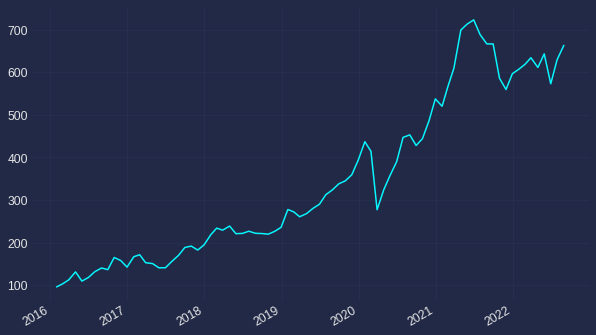

In [ ]:
orig = retornos_modelo.retorno+1 #.to_list()
xx = orig.cumprod()

xx= xx*100

# xxx = pd.DataFrame(data = {"retorno": retornos_model}, index = [(mes + relativedelta(months=1))])

xx.plot()



In [ ]:
#pegando dados do ibov

ibovespa = pdr.get_data_yahoo('^BVSP', start="2015-12-30", end= "2022-08-12" )['Adj Close']

retornos_ibovespa = ibovespa.resample("M").last().pct_change().dropna()

retornos_ibovespa

[*********************100%***********************]  1 of 1 completed


Date
2016-01-31   -0.067912
2016-02-29    0.059100
2016-03-31    0.169673
2016-04-30    0.077035
2016-05-31   -0.100889
                ...   
2022-04-30   -0.101026
2022-05-31    0.032213
2022-06-30   -0.115033
2022-07-31    0.046914
2022-08-31    0.063520
Freq: M, Name: Adj Close, Length: 80, dtype: float64

In [ ]:
retornos_modelo['ibovespa'] = retornos_ibovespa.values

retornos_modelo.style.format({
    'retorno': '{:,.2%}'.format,
    'ibovespa': '{:,.2%}'.format
})

,retorno,ibovespa
2016-01-31 00:00:00,-4.32%,-6.79%
2016-02-29 00:00:00,7.69%,5.91%
2016-03-29 00:00:00,9.13%,16.97%
2016-04-30 00:00:00,16.51%,7.70%
2016-05-30 00:00:00,-16.48%,-10.09%
2016-06-30 00:00:00,7.75%,6.30%
2016-07-30 00:00:00,11.46%,11.22%
2016-08-31 00:00:00,6.64%,1.03%
2016-09-30 00:00:00,-2.72%,0.80%
2016-10-30 00:00:00,20.92%,11.24%


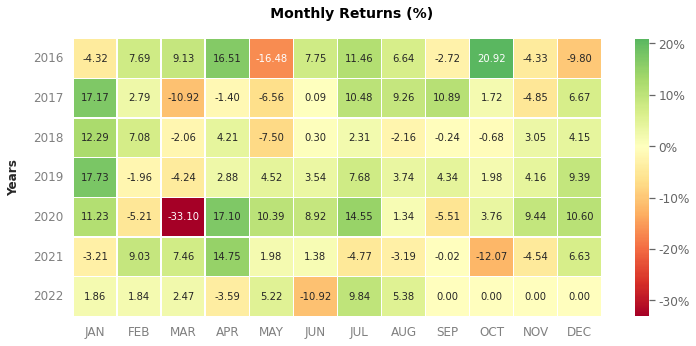

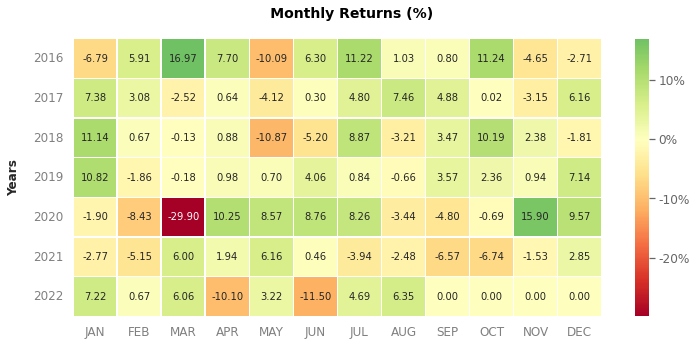

In [ ]:
qs.extend_pandas()

retornos_modelo['retorno'].plot_monthly_heatmap()

retornos_modelo['ibovespa'].plot_monthly_heatmap()

#olha pra mim agora: se você chegar em alguma empresa do mercado financeiro, ou tem vontade de trabalhar como analista, existe alguma chance de você chegar 
#na entrevista de emprego com esse conhecimento em Python e você não passar? Você sabendo programar um modelo desse, com uma boa visualização de dados, você
#passa pra qualquer lugar. 

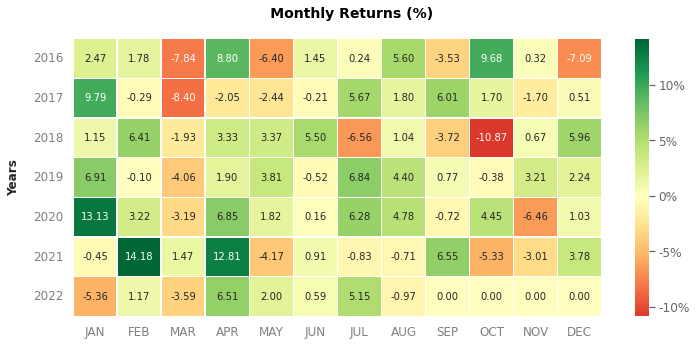

In [ ]:
serie_long_short = retornos_modelo['retorno'] - retornos_modelo['ibovespa']

serie_long_short.plot_monthly_heatmap()

In [ ]:
#meses batendo o mercado 

retornos_modelo_bateu_mercado = retornos_modelo.copy()

retornos_modelo_bateu_mercado['bateu_mercado'] = retornos_modelo['retorno'] > retornos_modelo['ibovespa']

print(retornos_modelo_bateu_mercado)

proporcao_meses_bateu_o_mercado = sum(retornos_modelo_bateu_mercado['bateu_mercado']/len(retornos_modelo_bateu_mercado['bateu_mercado']))
print(proporcao_meses_bateu_o_mercado)

             retorno  ibovespa  bateu_mercado
2016-01-31 -0.043231 -0.067912           True
2016-02-29  0.076903  0.059100           True
2016-03-29  0.091320  0.169673          False
2016-04-30  0.165053  0.077035           True
2016-05-30 -0.164843 -0.100889          False
...              ...       ...            ...
2022-04-30 -0.035906 -0.101026           True
2022-05-30  0.052199  0.032213           True
2022-06-30 -0.109157 -0.115033           True
2022-07-30  0.098388  0.046914           True
2022-08-31  0.053821  0.063520          False

[80 rows x 3 columns]
0.6249999999999998


In [ ]:
#retorno anual

retorno_anual = retornos_modelo.copy()
retorno_anual['retorno'] = retorno_anual['retorno'] + 1 
retorno_anual['ibovespa'] = retorno_anual['ibovespa'] + 1

retorno_anual["ano"] = retorno_anual.index.year

retorno_anual["retorno_acumulado_ano"] = retorno_anual.groupby('ano')['retorno'].cumprod() - 1
retorno_anual["retorno_acumulado_ibov"] = retorno_anual.groupby('ano')['ibovespa'].cumprod() - 1

retorno_anual = retorno_anual.reset_index()

retorno_anual = (retorno_anual.groupby(['ano']).tail(1))[['ano', 'retorno_acumulado_ano', 'retorno_acumulado_ibov']]

retorno_anual.style.format({
    'retorno_acumulado_ano': '{:,.2%}'.format,
    'retorno_acumulado_ibov': '{:,.2%}'.format})


,ano,retorno_acumulado_ano,retorno_acumulado_ibov
11,2016,42.23%,38.93%
23,2017,36.72%,26.86%
35,2018,21.20%,15.03%
47,2019,66.66%,31.95%
59,2020,36.82%,2.88%
71,2021,10.99%,-12.14%
79,2022,11.18%,4.67%


In [ ]:
cumulative_ret_modelo = (retornos_modelo.retorno + 1).cumprod() - 1

cumulative_ret_ibov = (retornos_modelo.ibovespa + 1).cumprod() - 1

df_acumulado = pd.DataFrame(data = {"retorno_acum_modelo": cumulative_ret_modelo, "retorno_acum_ibov" : cumulative_ret_ibov }, index = cumulative_ret_ibov.index)

df_acumulado = df_acumulado.resample("Y").last()

df_acumulado = df_acumulado[['retorno_acum_modelo', 'retorno_acum_ibov']]

df_acumulado.style.format({
    'retorno_acum_modelo': '{:,.2%}'.format,
    'retorno_acum_ibov': '{:,.2%}'.format
})

,retorno_acum_modelo,retorno_acum_ibov
2016-12-31 00:00:00,42.23%,38.93%
2017-12-31 00:00:00,94.47%,76.24%
2018-12-31 00:00:00,135.68%,102.74%
2019-12-31 00:00:00,292.78%,167.51%
2020-12-31 00:00:00,437.40%,175.22%
2021-12-31 00:00:00,496.47%,141.80%
2022-12-31 00:00:00,563.17%,153.10%


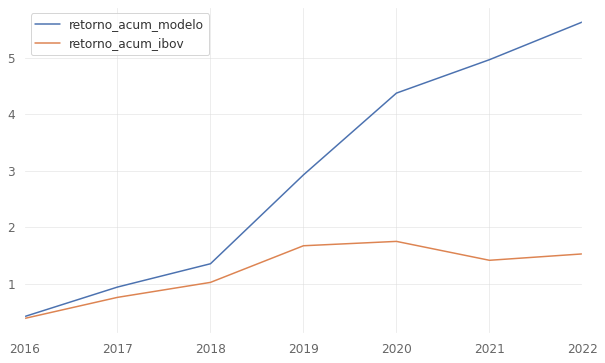

In [ ]:
df_acumulado.plot()

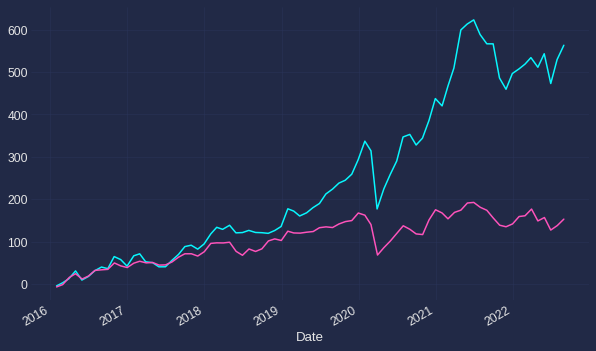

In [ ]:
orig = retornos_ibovespa+1 #.to_list()
xxx = orig.cumprod()

xx=xx-100
xxx= xxx*100-100

# xxx = pd.DataFrame(data = {"retorno": retornos_model}, index = [(mes + relativedelta(months=1))])

xx.plot()
xxx.plot()

In [ ]:
!pip install mplcyberpunk
import mplcyberpunk
import matplotlib.ticker as mtick

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

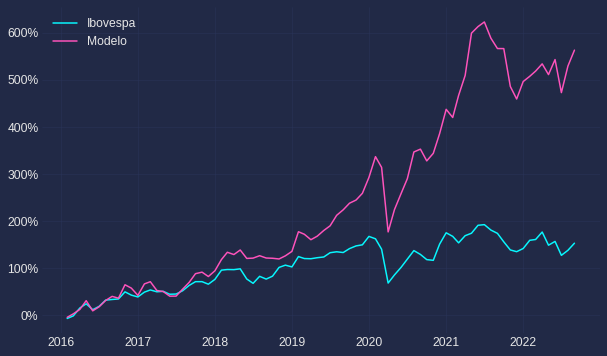

In [ ]:
xx=xx/100
xxx= xxx/100

fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(xxx.index, xxx, label='Ibovespa')
ax.plot(xxx.index, xx, label='Modelo')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend()
plt.plot